### Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

### Loading Datasets

In [4]:
results=pd.read_csv('Datasets/results.csv')
former_names=pd.read_csv('Datasets/former_names.csv')
goal_scorers=pd.read_csv('Datasets/goalscorers.csv')
shootouts=pd.read_csv('Datasets/shootouts.csv')

### Initial Data Inspection

In [5]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
# 1 Denotes home team win, 2 denotes away team win and 0 denotes a draw
results['winner']=np.where(
    results['home_score']>results['away_score'],1,
    np.where(results['away_score']>results['home_score'],2,0)
)

In [7]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1


In [8]:
results['date']=pd.to_datetime(results['date'])

In [9]:
results.describe()

,date,home_score,away_score,winner
count,48891,48891.000000,48891.000000,48891.000000
mean,1994-01-11 01:39:27.822298624,1.757338,1.182447,1.055368
min,1872-11-30 00:00:00,0.000000,0.000000,0.000000
25%,1980-05-16 12:00:00,1.000000,0.000000,1.000000
50%,2000-04-26 00:00:00,1.000000,1.000000,1.000000
75%,2013-02-06 00:00:00,2.000000,2.000000,2.000000
max,2025-12-18 00:00:00,31.000000,21.000000,2.000000
std,NaN,1.772215,1.401666,0.711837


In [10]:
results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
winner        0
dtype: int64

In [11]:
results.duplicated().sum()

np.int64(0)

In [12]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48891 entries, 0 to 48890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        48891 non-null  datetime64[ns]
 1   home_team   48891 non-null  object        
 2   away_team   48891 non-null  object        
 3   home_score  48891 non-null  int64         
 4   away_score  48891 non-null  int64         
 5   tournament  48891 non-null  object        
 6   city        48891 non-null  object        
 7   country     48891 non-null  object        
 8   neutral     48891 non-null  bool          
 9   winner      48891 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(5)
memory usage: 3.4+ MB


In [13]:
shootouts.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [14]:
shootouts['date']=pd.to_datetime(shootouts['date'])

In [15]:
shootouts['first_shooter'].value_counts()

first_shooter
Colombia                  11
Italy                     10
Brazil                     9
Uruguay                    8
Argentina                  8
                          ..
British Virgin Islands     1
Slovenia                   1
Venezuela                  1
Cambodia                   1
Gozo                       1
Name: count, Length: 89, dtype: int64

In [16]:
shootouts.describe(include='all')

,date,home_team,away_team,winner,first_shooter
count,662,662,662,662,237
unique,NaN,185,193,181,89
top,NaN,South Africa,Egypt,South Korea,Colombia
freq,NaN,18,16,15,11
mean,2003-09-14 16:03:37.522658688,NaN,NaN,NaN,NaN
min,1967-08-22 00:00:00,NaN,NaN,NaN,NaN
25%,1992-09-02 06:00:00,NaN,NaN,NaN,NaN
50%,2003-09-25 00:00:00,NaN,NaN,NaN,NaN
75%,2016-06-29 00:00:00,NaN,NaN,NaN,NaN
max,2025-12-12 00:00:00,NaN,NaN,NaN,NaN


In [17]:
shootouts.isna().sum()

date               0
home_team          0
away_team          0
winner             0
first_shooter    425
dtype: int64

In [18]:
b=len(shootouts)
a=shootouts['first_shooter'].isna().sum()
print((a/b))


0.6419939577039275


In [19]:
for el in shootouts.columns:  
    if shootouts[el].isna().sum()>1:
        null_percentage=(shootouts[el].isna().sum()/len(shootouts))*100
        print(f'Column/s: {el} has {null_percentage}% of Null Values')

Column/s: first_shooter has 64.19939577039275% of Null Values


In [20]:
# We can see that the column first_shooter has 64% of null data so we remove the column entirely
shootouts.drop(columns=['first_shooter'],inplace=True)

In [21]:
shootouts.duplicated().sum()

np.int64(0)

In [22]:
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       662 non-null    datetime64[ns]
 1   home_team  662 non-null    object        
 2   away_team  662 non-null    object        
 3   winner     662 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 20.8+ KB


In [23]:
former_names.head()

,current,former,start_date,end_date
0,Benin,Dahomey,1959-11-08,1975-11-30
1,Burkina Faso,Upper Volta,1960-04-14,1984-08-04
2,Curaçao,Netherlands Antilles,1957-03-03,2010-10-10
3,Czechoslovakia,Bohemia,1903-04-05,1919-01-01
4,Czechoslovakia,Bohemia and Moravia,1939-01-01,1945-05-01


In [24]:
goal_scorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


-- Countries Former Names
-- Goalscoress

In [25]:
former_names.info()
goal_scorers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   current     34 non-null     object
 1   former      34 non-null     object
 2   start_date  34 non-null     object
 3   end_date    34 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44447 entries, 0 to 44446
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44447 non-null  object 
 1   home_team  44447 non-null  object 
 2   away_team  44447 non-null  object 
 3   team       44447 non-null  object 
 4   scorer     44399 non-null  object 
 5   minute     44191 non-null  float64
 6   own_goal   44447 non-null  bool   
 7   penalty    44447 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


Fixing Dates because they are string right now
-they need to be changed into datetime

In [26]:
# former_names dates
former_names['start_date'] = pd.to_datetime(former_names['start_date'])
former_names['end_date'] = pd.to_datetime(former_names['end_date'])

# goal_scorers match dates
goal_scorers['date'] = pd.to_datetime(goal_scorers['date'])


We need to map historical country names to current names to avoid duplicates

In [27]:
# create mapping from former to current
former_to_current = dict(zip(former_names['former'], former_names['current']))

# replace historical names in goal_scorers
goal_scorers['team'] = goal_scorers['team'].replace(former_to_current)
goal_scorers['home_team'] = goal_scorers['home_team'].replace(former_to_current)
goal_scorers['away_team'] = goal_scorers['away_team'].replace(former_to_current)


In [28]:
#converting float minute to int by dropping NaN values
goal_scorers = goal_scorers.dropna(subset=['minute'])
goal_scorers['minute'] = goal_scorers['minute'].astype(int)

In [29]:
print(goal_scorers.isna().sum())
print(former_names.isna().sum())


date         0
home_team    0
away_team    0
team         0
scorer       0
minute       0
own_goal     0
penalty      0
dtype: int64
current       0
former        0
start_date    0
end_date      0
dtype: int64


In [30]:
#checking duplicates for both before dropping them 
print(goal_scorers.duplicated().sum())
print(former_names.duplicated().sum())

# only drop duplicates in goal_scorers as former_names has no duplicates
goal_scorers = goal_scorers.drop_duplicates()

10
0


### Explanatory Data Analysis

In [31]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1


In [32]:
results['neutral'].value_counts()

neutral
False    35990
True     12901
Name: count, dtype: int64

In [33]:
results_num_cols=results.select_dtypes(include=['number','bool']).columns
results_cat_cols=results.select_dtypes(include=('object')).columns

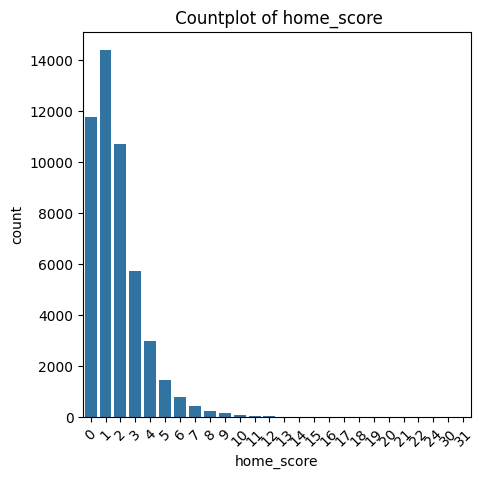

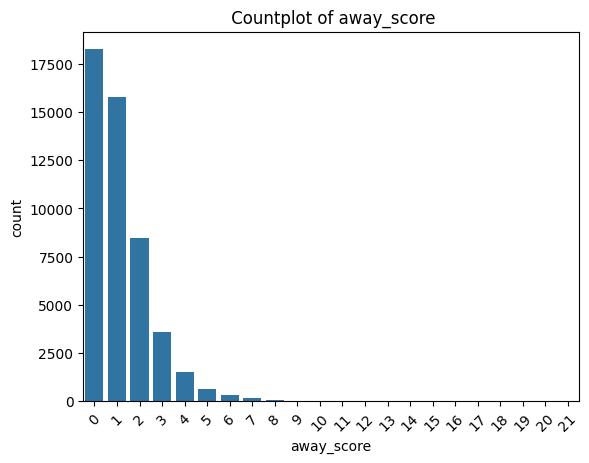

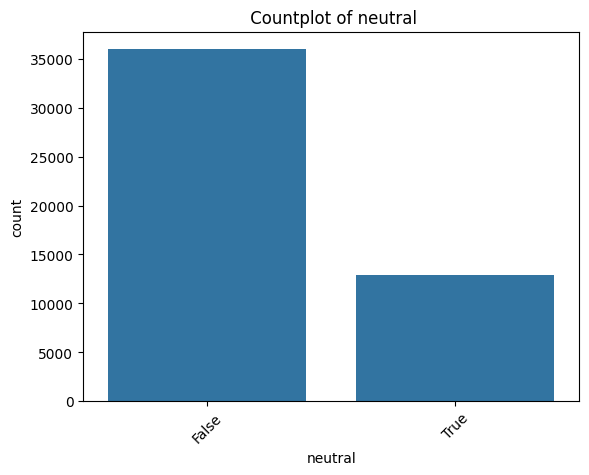

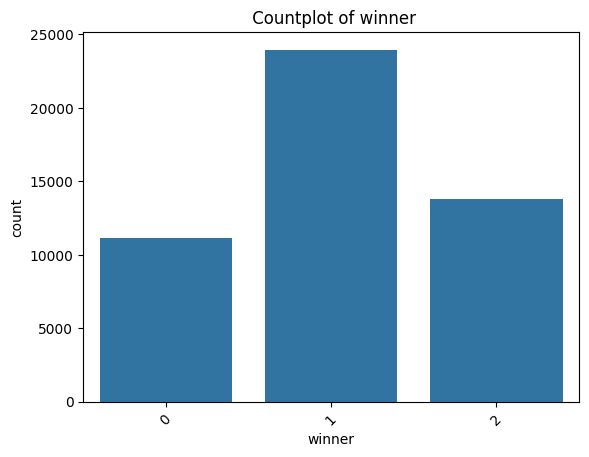

In [34]:
plt.figure(figsize=(5,5))
for col in results_num_cols:
    sns.countplot(data=results,x=col)
    plt.title(f' Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()


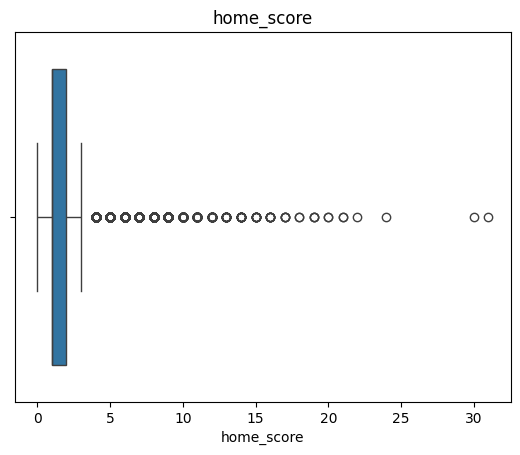

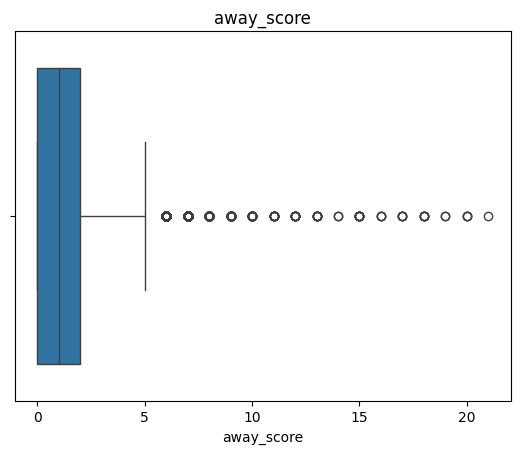

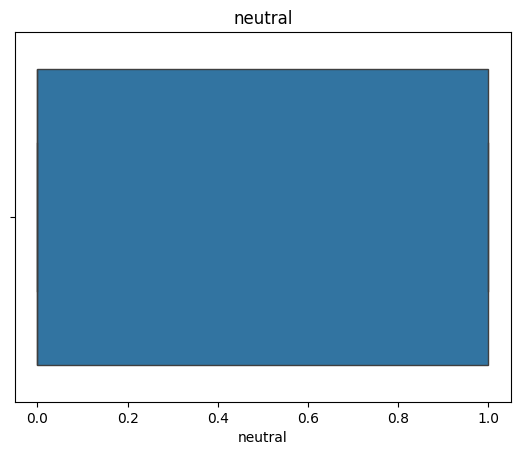

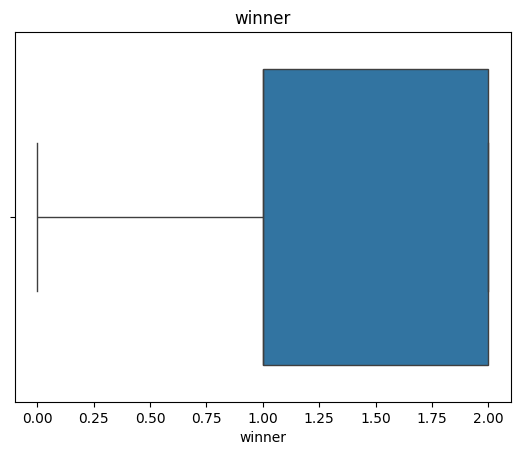

In [35]:
for col in results_num_cols:
    sns.boxplot(
        data=results,
        x=col
    )
    plt.title(col)
    plt.show()


In [36]:
results['away_score'].value_counts()

away_score
0     18247
1     15761
2      8446
3      3597
4      1521
5       633
6       326
7       162
8        78
9        38
10       28
11       10
12        9
15        8
13        7
18        5
17        4
16        3
20        3
14        2
19        2
21        1
Name: count, dtype: int64

In [37]:
results['home_score'].value_counts()

home_score
1     14389
0     11776
2     10717
3      5741
4      2988
5      1467
6       785
7       428
8       233
9       147
10       74
11       48
12       32
13       19
14       14
15        9
16        7
17        4
19        3
21        2
20        2
18        2
30        1
24        1
22        1
31        1
Name: count, dtype: int64

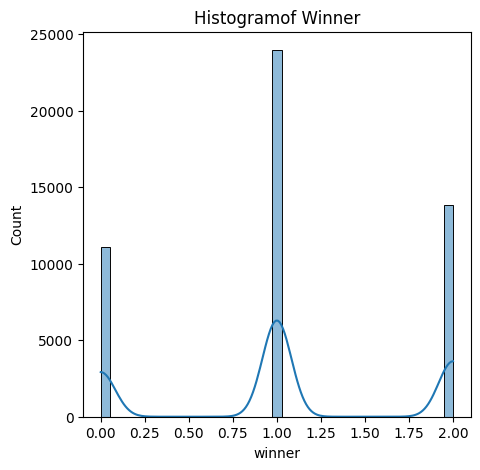

In [38]:
plt.figure(figsize=(5,5))
sns.histplot(results['winner'],kde=True)
plt.title('Histogramof Winner')
plt.show()

In [39]:
print(results['winner'].skew())

-0.08031315898104271


In [40]:
shootouts.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand


In [57]:
shootouts.drop(columns='date')
for col in shootouts:
    print(col)

date
home_team
away_team
winner


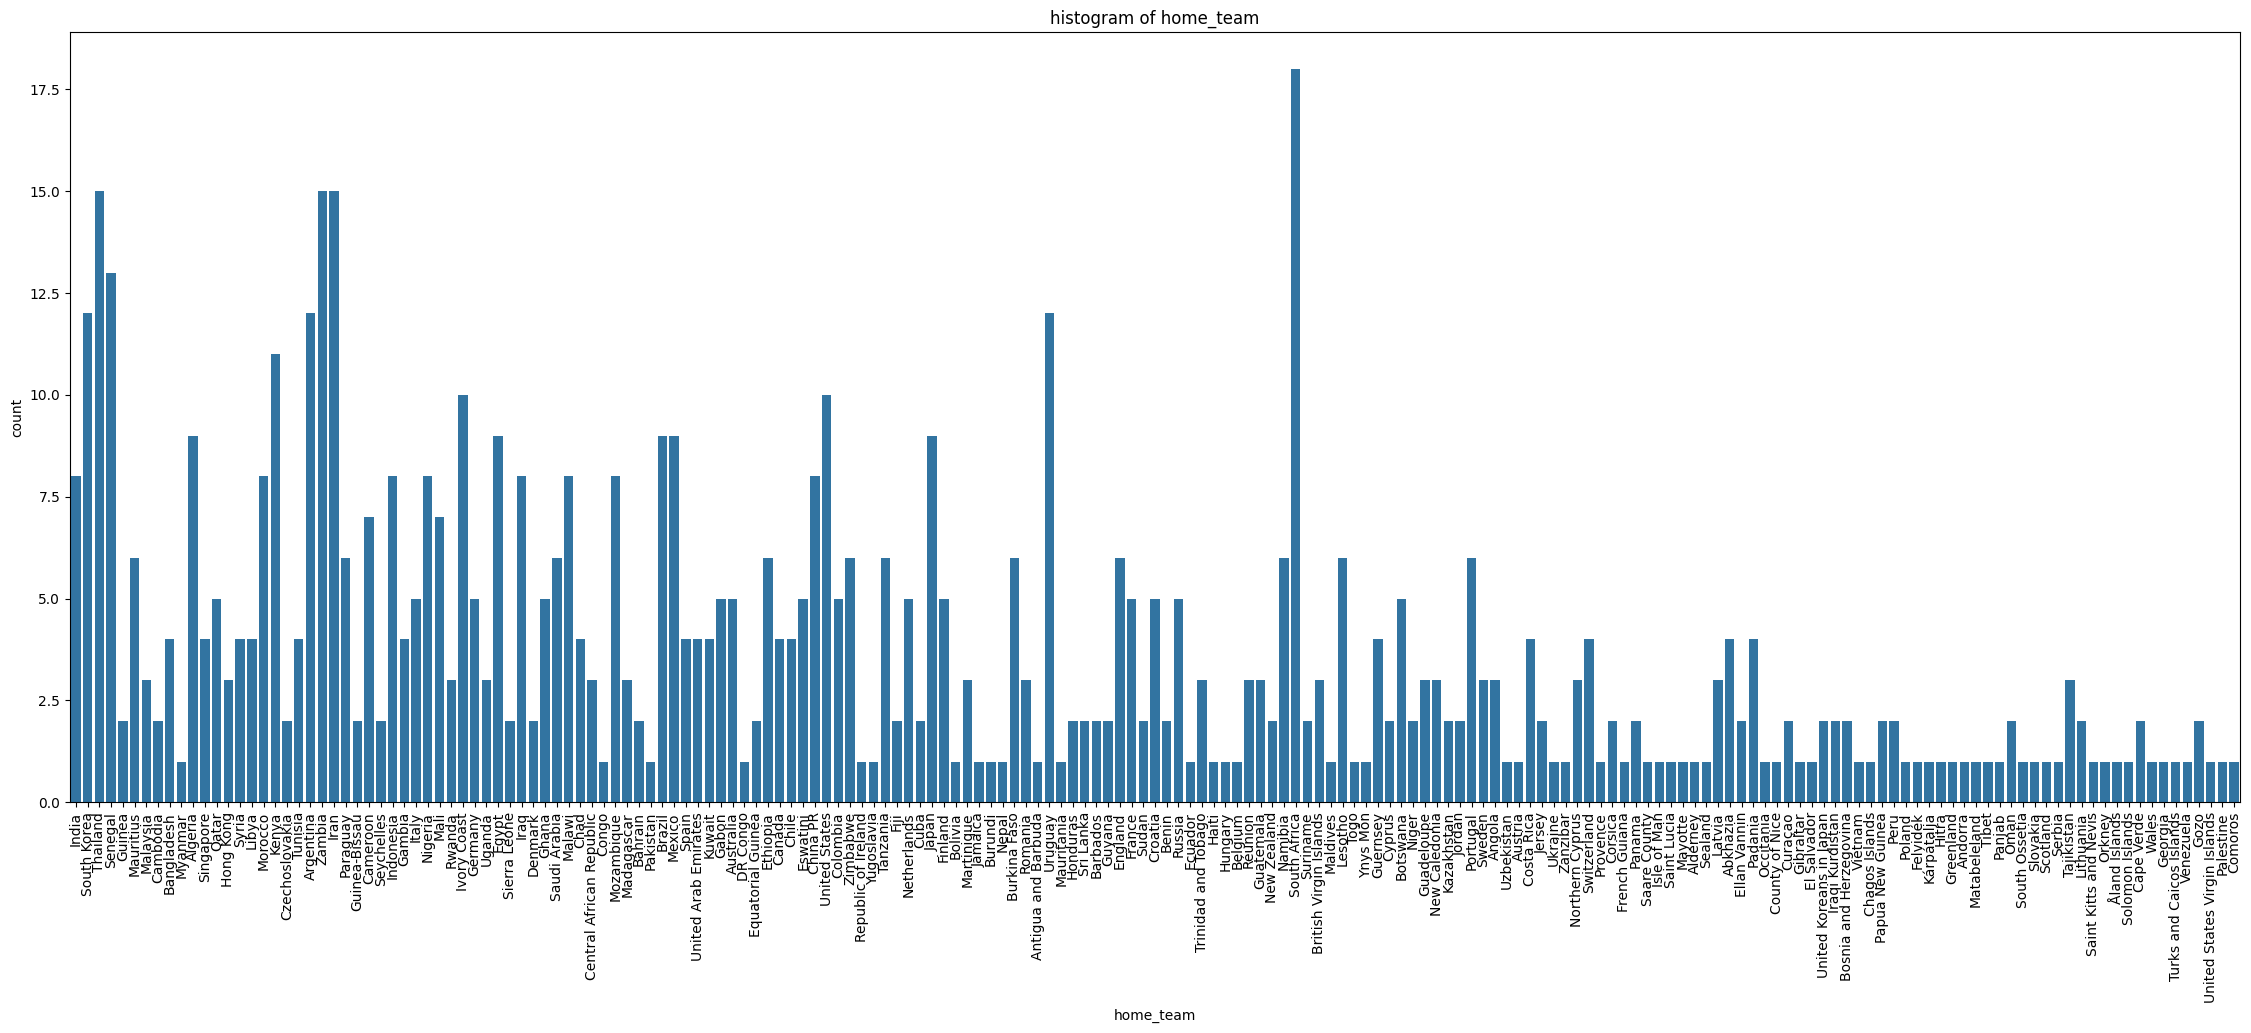

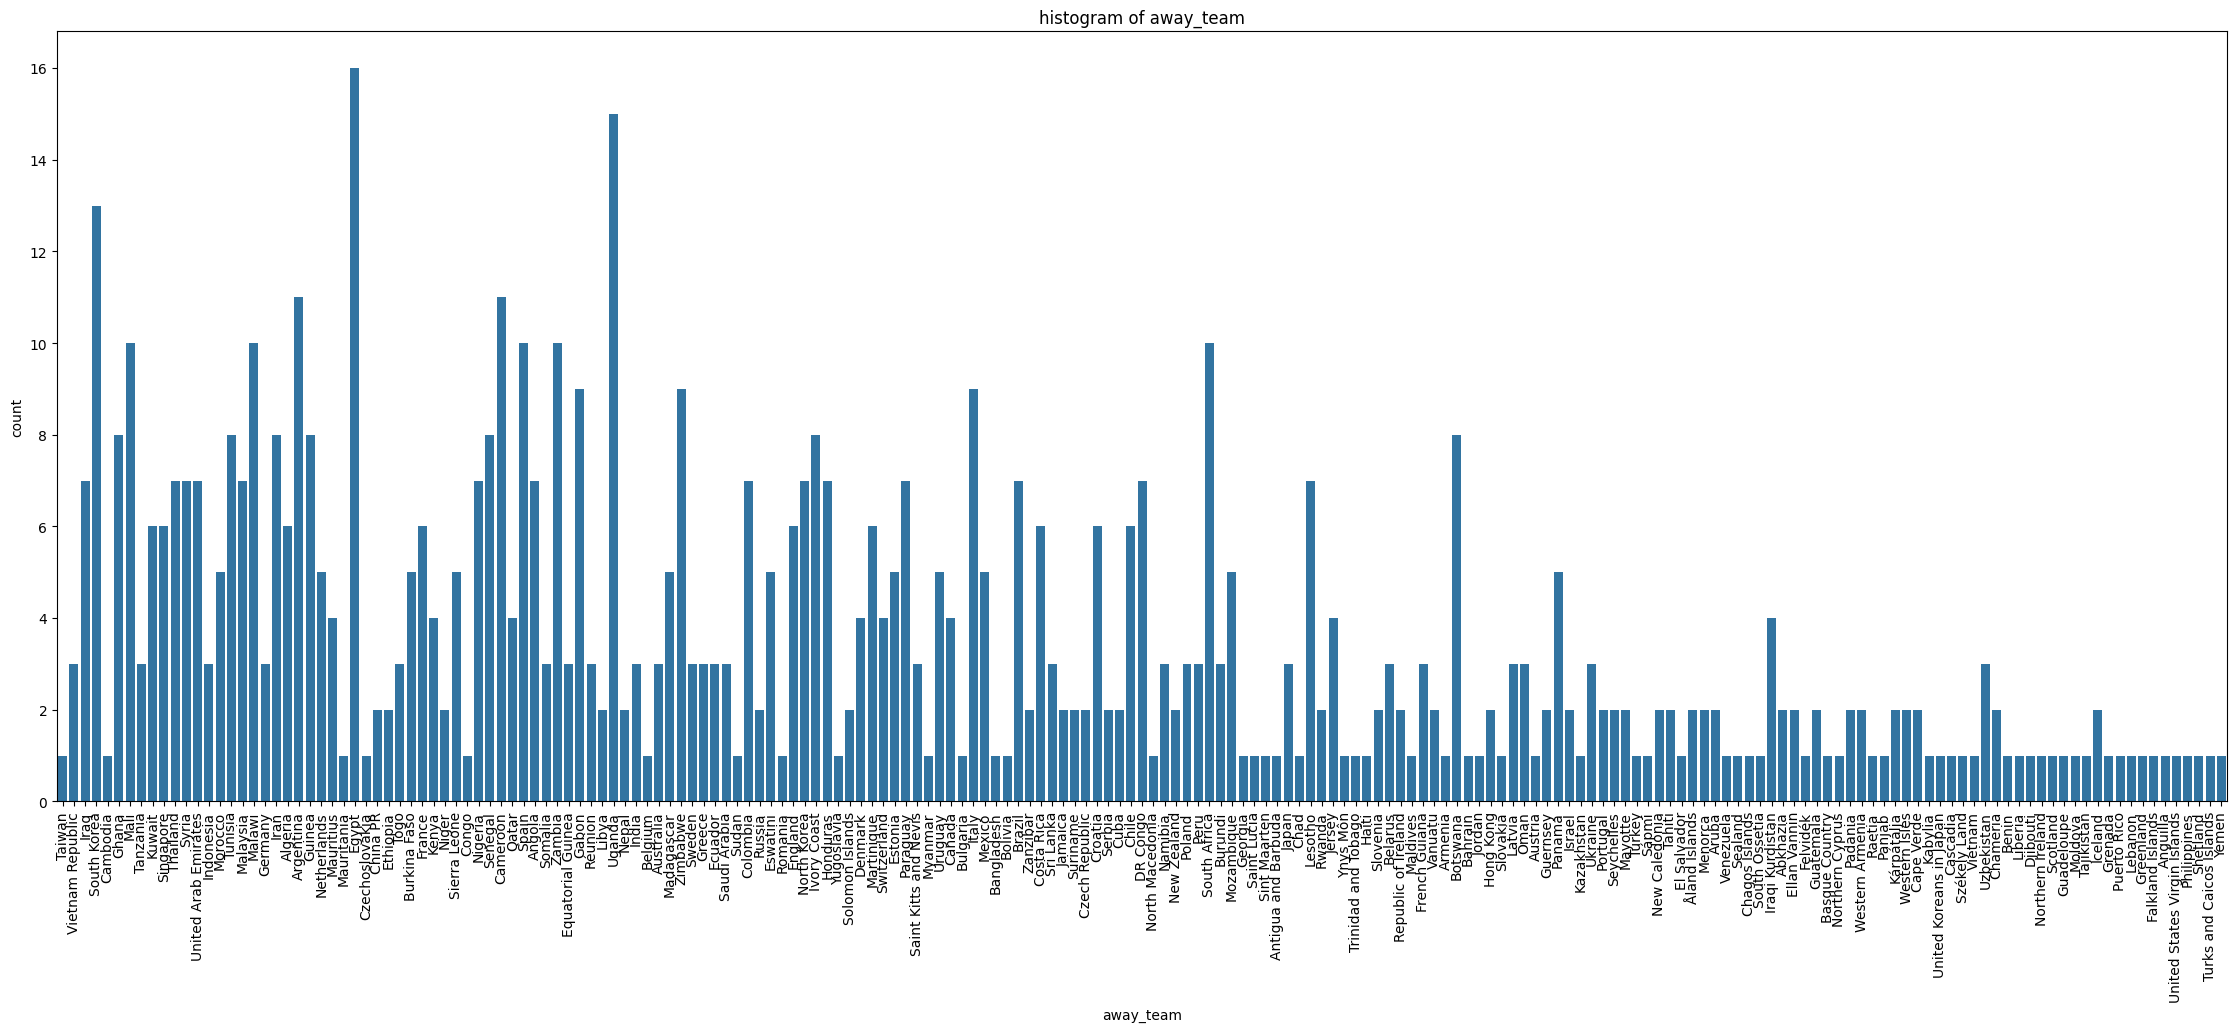

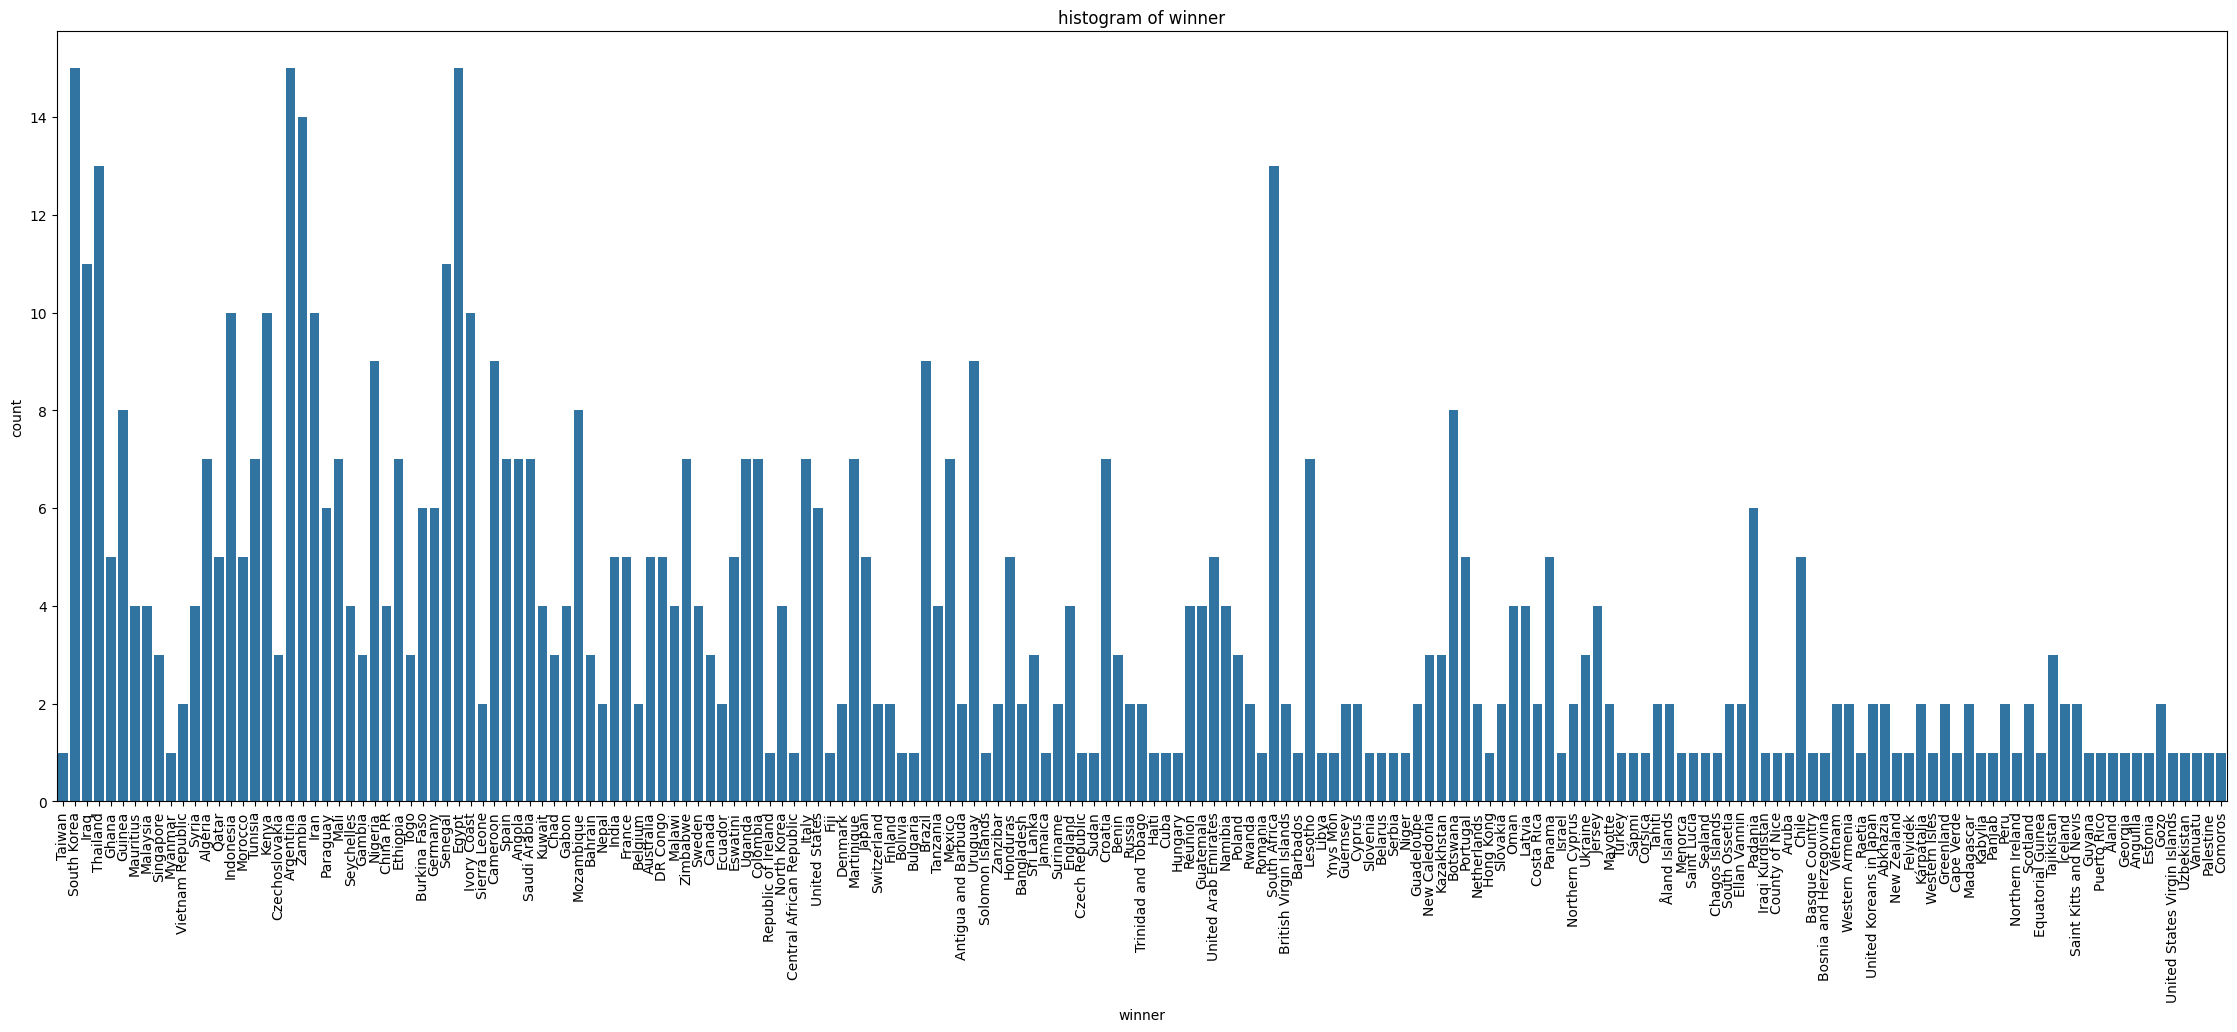

In [58]:


for col in shootouts.drop(columns='date'):
    plt.figure(figsize=(28,10))
    sns.countplot(data=shootouts,x=col)
    plt.title(f'histogram of {col}')
    plt.xticks(rotation=90)
    plt.show()